Mi modelo de Regresión Lineal Múltiple

In [5]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/arieliyogal02arg/Trabajos_UPSO/main/precio_casas.csv", sep=';')
print(df.head())

   pies_cuadrados_casa  num_banios  num_habitaciones  num_cocinas  \
0                 1710           2                 3            1   
1                 1262           2                 3            1   
2                 1786           2                 3            1   
3                 1717           1                 3            1   
4                 2198           2                 4            1   

   num_coches_garaje  pies_cuadrados_garaje  precio_dolares  
0                  2                    548          208500  
1                  2                    460          181500  
2                  2                    608          223500  
3                  3                    642          140000  
4                  3                    836          250000  


Para visualizar la relación directa entre el tamaño de la casa y su precio, vemos un gráfico de dispersión donde el eje X represente 'pies_cuadrados_casa' y el eje Y represente 'precio_dolares'. Esto nos permitirá observar patrones de correlación entre estas dos variables.

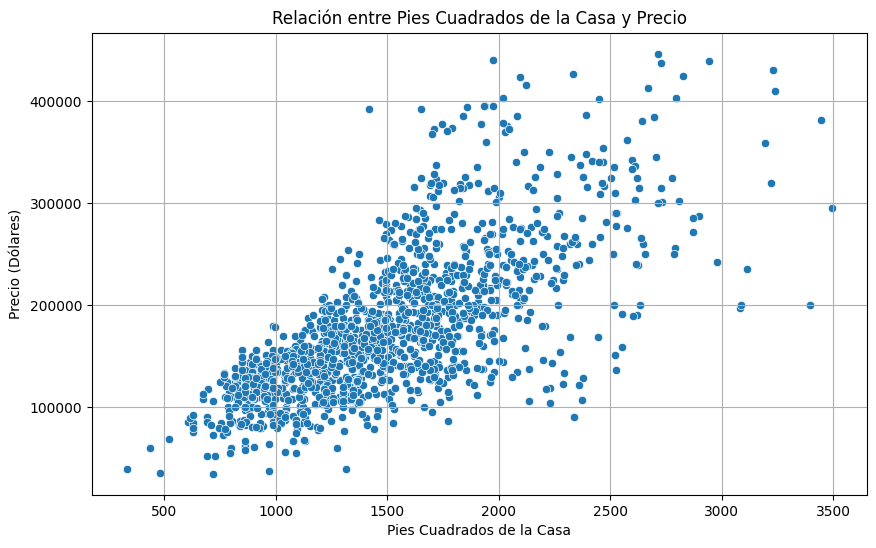

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pies_cuadrados_casa', y='precio_dolares')
plt.title('Relación entre Pies Cuadrados de la Casa y Precio')
plt.xlabel('Pies Cuadrados de la Casa')
plt.ylabel('Precio (Dólares)')
plt.grid(True)
plt.show()

## Cambio de estructura de datos a matricial


Convertir el DataFrame a una estructura de matriz.
Para ello se separan la variable objetivo ('precio_dolares') de las variables predictoras. Asignaré 'precio_dolares' a `y` y las columnas restantes a `X`.


In [5]:
y = df['precio_dolares']
X = df.drop('precio_dolares', axis=1)

print("Dimensiones de X (características):", X.shape)
print("Dimensiones de y (objetivo):", y.shape)
print("Primeras 5 filas de X:")
print(X.head())
print("Primeros 5 valores de y:")
print(y.head())

Dimensiones de X (características): (1443, 6)
Dimensiones de y (objetivo): (1443,)
Primeras 5 filas de X:
   pies_cuadrados_casa  num_banios  num_habitaciones  num_cocinas  \
0                 1710           2                 3            1   
1                 1262           2                 3            1   
2                 1786           2                 3            1   
3                 1717           1                 3            1   
4                 2198           2                 4            1   

   num_coches_garaje  pies_cuadrados_garaje  
0                  2                    548  
1                  2                    460  
2                  2                    608  
3                  3                    642  
4                  3                    836  
Primeros 5 valores de y:
0    208500
1    181500
2    223500
3    140000
4    250000
Name: precio_dolares, dtype: int64



Convertir los datos a una estructura matricial (arreglos de NumPy): es un paso crucial para preparar los datos para los algoritmos de aprendizaje automático. Aunque `X` es un DataFrame y `y` es una Serie, esta conversión garantiza la compatibilidad con las librerías de modelado.

In [6]:
X_matrix = X.values
y_matrix = y.values

print("Tipo de X_matrix:", type(X_matrix))
print("Dimensiones de X_matrix:", X_matrix.shape)
print("Tipo de y_matrix:", type(y_matrix))
print("Dimensiones de y_matrix:", y_matrix.shape)

Tipo de X_matrix: <class 'numpy.ndarray'>
Dimensiones de X_matrix: (1443, 6)
Tipo de y_matrix: <class 'numpy.ndarray'>
Dimensiones de y_matrix: (1443,)


## Particionado de Datos en Entrenamiento y Test


Dividir el conjunto de datos en subconjuntos de entrenamiento y prueba para la creación y evaluación del modelo. Se dividen los datos en conjuntos de entrenamiento y prueba usando train_test_split de sklearn.model_selection con los parámetros especificados y luego imprimir las formas de los arreglos resultantes.


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_matrix, y_matrix, test_size=0.2, random_state=42)

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (1154, 6)
Dimensiones de X_test: (289, 6)
Dimensiones de y_train: (1154,)
Dimensiones de y_test: (289,)


## Generación del Modelo con Datos de Entrenamiento


Construir y entrenar el modelo utilizando el conjunto de datos de entrenamiento.
Se importa el modelo LinearRegression, instanciarlo, entrenarlo usando los datos de entrenamiento (X_train, y_train), y luego imprimir sus coeficientes y el intercepto según las instrucciones.

In [8]:
from sklearn.linear_model import LinearRegression

# Instanciar el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

print("Coeficientes del modelo:", model.coef_)
print("Intercepto del modelo:", model.intercept_)

Coeficientes del modelo: [ 8.89375304e+01  1.56538273e+04 -1.78191158e+04 -5.56487346e+04
  1.88202321e+04  5.30971693e+01]
Intercepto del modelo: 72196.8330608112


Los coeficientes son los 'pesos' que el modelo asigna a cada una de tus características de entrada. Cada coeficiente dice cuánto cambia la variable objetivo (en este caso, el precio_dolares) por cada unidad de cambio en una característica específica, manteniendo todas las demás características constantes.
Por ejemplo pies_cuadrados_casa (coeficiente ≈ 88.94): Por cada pie cuadrado adicional en la casa, se espera que el precio de la casa aumente en aproximadamente $88.94, asumiendo que todas las demás características permanecen iguales.

En modelos multivariados, los coeficientes no solo reflejan la relación directa, sino también cómo una variable interactúa con otras. Podría indicar que, en este dataset, las casas con más habitaciones pueden tener otras características que las hacen menos valiosas o que es una característica redundante o correlacionada con otras de forma compleja.


El intercepto es el valor predicho de la variable objetivo (precio_dolares) cuando todas las variables predictoras (todas las características) son cero. En otras palabras, es el punto donde la línea de regresión cruza el eje Y cuando todas las X son 0.
Significado práctico: En el contexto de este modelo de precios de casas, un intercepto de 72,196.83 significa que, teóricamente, una casa que tuviera 0 pies cuadrados, 0 baños, 0 habitaciones, 0 cocinas, 0 espacios de garaje y 0 pies cuadrados de garaje, costaría 72,196.83
Es un componente necesario de la ecuación de la línea de regresión.


## Evaluación del Modelo con Datos de Entrenamiento


Evaluar el rendimiento del modelo utilizando los datos de entrenamiento para verificar si hay sobreajuste.
Se importan las métricas de evaluación necesarias de sklearn.metrics, para calcular R-cuadrado, MAE y RMSE.


In [9]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_train_pred = model.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print(f"R-cuadrado (Entrenamiento): {r2_train:.4f}")
print(f"Error Absoluto Medio (Entrenamiento): {mae_train:.2f}")
print(f"Error Cuadrático Medio (Entrenamiento): {mse_train:.2f}")
print(f"Raíz del Error Cuadrático Medio (Entrenamiento): {rmse_train:.2f}")

R-cuadrado (Entrenamiento): 0.7085
Error Absoluto Medio (Entrenamiento): 27587.64
Error Cuadrático Medio (Entrenamiento): 1427954732.33
Raíz del Error Cuadrático Medio (Entrenamiento): 37788.29


Análisis con los datos de entrenamiento:
Aproximadamente el 70.85% de la variabilidad en los precios de las casas en nuestro conjunto de entrenamiento puede ser explicada por nuestro modelo.* El resto de la variabilidad (alrededor del 29.15%) se debe a factores que el modelo no ha capturado o a ruido en los datos.
¿Es bueno?: Un R-cuadrado más cercano a 1 indica que el modelo explica una mayor proporción de la varianza. Un 70.85% es un valor razonablemente bueno, lo que sugiere que el modelo tiene una capacidad explicativa decente sobre los datos de entrenamiento.


Error Absoluto Medio: en este caso, el modelo predice el precio de las casas con un error promedio de aproximadamente $27,587.64.  

¿Es bueno?: El MAE se expresa en las mismas unidades que la variable objetivo (dólares, en este caso), lo que lo hace muy interpretable.

Si el error promedio de casi  27.6 es aceptable, dependerá del contexto del negocio y del rango de precios de las casas. Para casas de millones, podría ser bajo; para casas de 100, podría ser alto.

Estos resultados indican que el modelo ha aprendido de manera efectiva de los datos de entrenamiento.
Sin embargo, para determinar si hay un sobreajuste (es decir, si el modelo es demasiado bueno en los datos de entrenamiento y no generalizará bien a datos nuevos), necesitamos evaluar el modelo con el conjunto de prueba (test data), que aún no ha sido visto por el modelo.

## Evaluación del Modelo con Datos de Test


Evaluar el rendimiento final del modelo utilizando el conjunto de datos de prueba, que no ha sido visto por el modelo durante el entrenamiento.


In [10]:
y_test_pred = model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print(f"R-cuadrado (Prueba): {r2_test:.4f}")
print(f"Error Absoluto Medio (Prueba): {mae_test:.2f}")
print(f"Error Cuadrático Medio (Prueba): {mse_test:.2f}")
print(f"Raíz del Error Cuadrático Medio (Prueba): {rmse_test:.2f}")

R-cuadrado (Prueba): 0.7209
Error Absoluto Medio (Prueba): 27433.09
Error Cuadrático Medio (Prueba): 1338650224.98
Raíz del Error Cuadrático Medio (Prueba): 36587.57


Comparación con Entrenamiento: Es una excelente señal que el R-cuadrado en el conjunto de prueba sea similar o incluso un poco mejor que en el de entrenamiento. Esto sugiere que el modelo generaliza bien y no ha sobreajustado a los datos de entrenamiento. Si el R-cuadrado de prueba fuera significativamente menor, indicaría sobreajuste.

Buen Ajuste y Generalización: Las métricas (R-cuadrado, MAE, RMSE) son muy similares entre los conjuntos de entrenamiento y prueba.
Esto es una señal excelente de que el modelo no ha memorizado los datos de entrenamiento (no hay sobreajuste) y es capaz de hacer predicciones precisas sobre datos que nunca ha visto.

Rendimiento Aceptable: Un R-cuadrado de aproximadamente 72% indica que el modelo explica una parte sustancial de la variabilidad en los precios de las casas. Un error promedio de predicción de alrededor de $27,433 (MAE) y una desviación estándar de errores de $$27,433 (MAE) y una desviación estándar de errores de $36,587 (RMSE) son valores que, dependiendo del rango de precios de las casas en el dataset y los requisitos del negocio, pueden considerarse buenos.

En resumen, el modelo de Regresión Lineal ha demostrado ser un predictor efectivo y fiable para el precio de las casas basado en las características proporcionadas.

¿Cómo se detecta el sobreajuste con las métricas de entrenamiento y prueba?
Esta es la clave para identificarlo. Cuando un modelo está sobreajustado, verás la siguiente situación:

Métricas de Entrenamiento (Training Metrics): El modelo tendrá un excelente rendimiento en los datos de entrenamiento. Por ejemplo:

R-cuadrado (Entrenamiento): Muy alto, cercano a 1.
MAE/RMSE (Entrenamiento): Muy bajos.
Métricas de Prueba (Test Metrics): El modelo tendrá un rendimiento significativamente peor en los datos de prueba (no vistos). Por ejemplo:

R-cuadrado (Prueba): Mucho más bajo que el R-cuadrado de entrenamiento.
MAE/RMSE (Prueba): Mucho más altos que el MAE/RMSE de entrenamiento.
En nuestro caso, afortunadamente, no hemos observado sobreajuste:

R-cuadrado (Entrenamiento): 0.7085
R-cuadrado (Prueba): 0.7209 (¡ligeramente mejor!)
MAE (Entrenamiento): 27587.64
MAE (Prueba): 27433.09 (¡ligeramente mejor!)
Como puedes ver, las métricas de prueba son muy similares (e incluso un poco mejores) que las de entrenamiento. Esto es una señal excelente de que nuestro modelo está generalizando bien y no está sobreajustado a los datos de entrenamiento.

¿Qué causa el sobreajuste?
Algunas causas comunes incluyen:

Modelo demasiado complejo: Un modelo con demasiados parámetros o que es inherentemente muy flexible para la cantidad de datos disponibles.
Demasiadas características: Si tienes muchas características que no son realmente relevantes para la variable objetivo.
Pocos datos de entrenamiento: Si el conjunto de datos de entrenamiento es muy pequeño y no representa la diversidad de los datos reales.
¿Cómo se combate el sobreajuste?
Más datos de entrenamiento: A menudo, tener más datos ayuda al modelo a ver más patrones y reducir la memorización.
Simplificar el modelo: Usar un modelo menos complejo o reducir el número de parámetros.
Regularización: Técnicas que penalizan la complejidad del modelo (ej. Ridge, Lasso).
Selección de características: Eliminar características irrelevantes o redundantes.
Validación cruzada: Usar técnicas más robustas para evaluar el modelo.

## Predicción de Precio para Datos Aleatorios:

Para predecir el precio de una vivienda con datos aleatorios, primero necesito crear un arreglo de NumPy que represente las características de una nueva casa, asegurándome de que el orden y el número de características coincidan con los datos de entrenamiento. Luego, usaré el método `predict()` de nuestro modelo entrenado para obtener la estimación del precio.

In [11]:
import numpy as np

# Recordatorio del orden de las características:
# 0: pies_cuadrados_casa
# 1: num_banios
# 2: num_habitaciones
# 3: num_cocinas
# 4: num_coches_garaje
# 5: pies_cuadrados_garaje

# Ejemplo de datos para una nueva casa:
# (1800 pies_cuadrados_casa, 2 baños, 3 habitaciones, 1 cocina,
#  2 coches_garaje, 500 pies_cuadrados_garaje)

nueva_casa_caracteristicas = np.array([[1800, 2, 3, 1, 2, 500]])

# Realizar la predicción
precio_predicho = model.predict(nueva_casa_caracteristicas)

print(f"Las características de la nueva casa son: {nueva_casa_caracteristicas[0]}")
print(f"El precio predicho para esta vivienda es: ${precio_predicho[0]:,.2f}")

Las características de la nueva casa son: [1800    2    3    1    2  500]
El precio predicho para esta vivienda es: $218,675.01
